In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
# find files
log_files = []
for path, subdirs, files in os.walk('logs'):
    for name in files:
        if name.endswith('.log'):
            log_file = os.path.join(path, name)
            log_files.append(log_file)

In [3]:
len(log_files)

40

In [4]:
def inverse_triangular(m):
    return round(math.sqrt(2 * m + 0.25) - 0.5)

In [5]:
records = []

for log_file in log_files:
    num_total_jobs = int(log_file.split('/')[-1].split('=')[-1].split('.')[0])
    with open(log_file) as file:
        for line in file:
            if line.startswith('solver:PROFILE'):
                line = line.strip()
                tokens = line.split()
                job_combinations = int(tokens[1].split(':')[-1])
                num_jobs = inverse_triangular(job_combinations)
                solve_time = float(tokens[2].split(':')[-1]) * 1000
                setup_time = float(tokens[3].split(':')[-1]) * 1000
                total_time = solve_time + setup_time
                records.append((num_jobs, job_combinations, solve_time, setup_time, total_time))

data = pd.DataFrame(records, columns=['num_jobs', 'job_combinations', 'solve_time_millis', 'setup_time_millis', 'total_time_millis'])

In [6]:
data = data[data['job_combinations'] <= 1000]

<Axes: xlabel='job_combinations', ylabel='total_time_millis'>

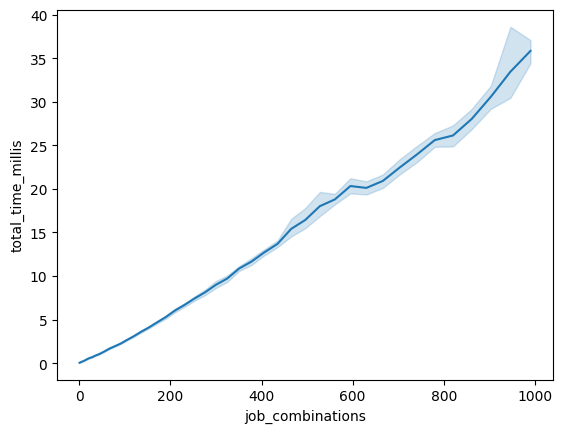

In [7]:
sns.lineplot(data=data, x="job_combinations", y="total_time_millis")

<Axes: xlabel='num_jobs', ylabel='total_time_millis'>

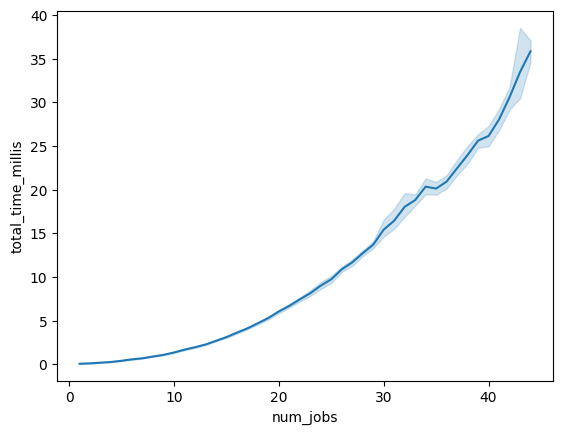

In [8]:
sns.lineplot(data=data, x="num_jobs", y="total_time_millis")